In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import random
from medpy.metric.binary import dc
from matplotlib.pyplot import figure

# Here is what you are working with

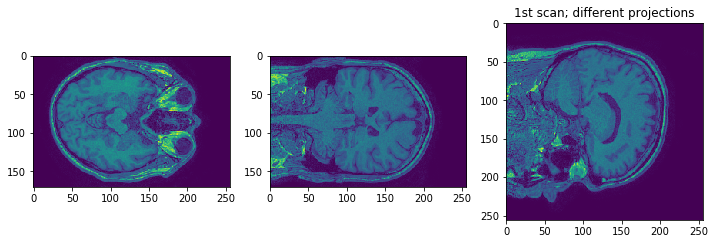

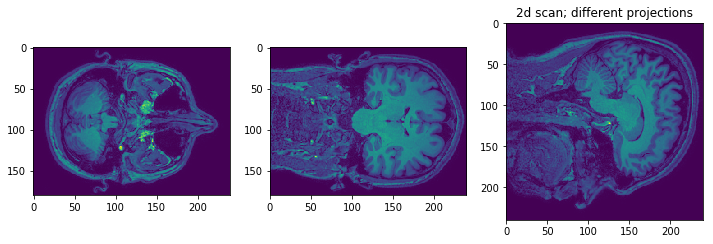

In [2]:
slc = 100
testPath1 = '../domain_img/CC0001_philips_15_55_M.nii.gz'
testPath2 = '../domain_img/CC0060_philips_3_29_M.nii.gz'

def demonstration (testPath,name,slc=100):
    testPath = testPath
    name = name
    img = nib.load(testPath)
    data = img.get_fdata()

    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,10))
    plt.title(name)
    ax1.imshow(data[:,:,slc])
    ax2.imshow(data[:,slc,:])
    ax3.imshow(data[slc,:,:])
    plt.show()
    
demonstration(testPath1, '1st scan; different projections')
demonstration(testPath2, '2d scan; different projections')

# Histograms

In [14]:
img1 = nib.load(testPath1)
img2 = nib.load(testPath2)
data1 = img1.get_fdata()
data2 = img2.get_fdata()

In [30]:
flat = data1.flatten()

#np.unique(flat)
flat /= np.amax(flat)
np.unique(flat)

array([0.        , 0.00181488, 0.00362976, 0.00544465, 0.00725953,
       0.00907441, 0.01088929, 0.01270417, 0.01451906, 0.01633394,
       0.01814882, 0.0199637 , 0.02177858, 0.02359347, 0.02540835,
       0.02722323, 0.02903811, 0.03085299, 0.03266788, 0.03448276,
       0.03629764, 0.03811252, 0.0399274 , 0.04174229, 0.04355717,
       0.04537205, 0.04718693, 0.04900181, 0.0508167 , 0.05263158,
       0.05444646, 0.05626134, 0.05807623, 0.05989111, 0.06170599,
       0.06352087, 0.06533575, 0.06715064, 0.06896552, 0.0707804 ,
       0.07259528, 0.07441016, 0.07622505, 0.07803993, 0.07985481,
       0.08166969, 0.08348457, 0.08529946, 0.08711434, 0.08892922,
       0.0907441 , 0.09255898, 0.09437387, 0.09618875, 0.09800363,
       0.09981851, 0.10163339, 0.10344828, 0.10526316, 0.10707804,
       0.10889292, 0.1107078 , 0.11252269, 0.11433757, 0.11615245,
       0.11796733, 0.11978221, 0.1215971 , 0.12341198, 0.12522686,
       0.12704174, 0.12885662, 0.13067151, 0.13248639, 0.13430

In [13]:
type(data1)

numpy.ndarray

## The meaningfull part of the histogram

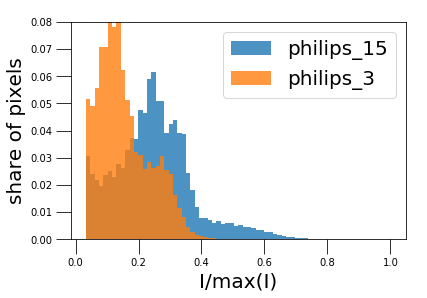

In [4]:
x, bins, p = plt.hist(data1.flatten()/data1.max(),bins=70,range=(1/30,1),alpha=0.8, label = 'philips_15')
for item in p:
    item.set_height(item.get_height()/sum(x))

x2, bins2, p2 = plt.hist(data2.flatten()/data2.max(),bins=70,range=(1/30,1),alpha=0.8, label = 'philips_3')
for item in p2:
    item.set_height(item.get_height()/sum(x2))
                      
                      
plt.ylim((0,0.08))
plt.legend(fontsize=20)
plt.tick_params(size=15)
plt.tick_params(size=15)
plt.xlabel('I/max(I)', fontsize = 20)
plt.ylabel('share of pixels', fontsize = 20)
plt.show()

## Histogram in full

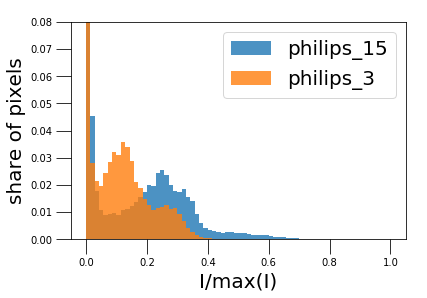

In [5]:
x, bins, p = plt.hist(data1.flatten()/data1.max(),bins=70,alpha=0.8, label = 'philips_15')
for item in p:
    item.set_height(item.get_height()/sum(x))

x2, bins2, p2 = plt.hist(data2.flatten()/data2.max(),bins=70,alpha=0.8, label = 'philips_3')
for item in p2:
    item.set_height(item.get_height()/sum(x2))
                      
                      
plt.ylim((0,0.08))
plt.legend(fontsize=20)
plt.tick_params(size=15)
plt.tick_params(size=15)
plt.xlabel('I/max(I)', fontsize = 20)
plt.ylabel('share of pixels', fontsize = 20)
plt.show()

__Note that x, bins, p = plt.hist(...) contains some valuable information (refer to plt documentation)__.

# Task 

Learn transformation from Philips_15 to Philips_3, which would match there pixels intensities distribution. Apply to Philips_15. 

In [10]:
import matplotlib.pyplot as plt

def _match_cumulative_cdf(source, template):
    """
    Return modified source array so that the cumulative density function of
    its values matches the cumulative density function of the template.
    """
    src_values, src_unique_indices, src_counts = np.unique(source.ravel(),
                                                           return_inverse=True,
                                                           return_counts=True)
    tmpl_values, tmpl_counts = np.unique(template.ravel(), return_counts=True)

    # calculate normalized quantiles for each array
    src_quantiles = np.cumsum(src_counts) / source.size
    tmpl_quantiles = np.cumsum(tmpl_counts) / template.size

    interp_a_values = np.interp(src_quantiles, tmpl_quantiles, tmpl_values)
    return interp_a_values[src_unique_indices].reshape(source.shape)

In [32]:
matched = _match_cumulative_cdf(data1, data2.flatten())

In [36]:
print(matched.shape)
print(data2.shape)

(171, 256, 256)
(180, 240, 240)


In [37]:
print(type(data1))

<class 'numpy.ndarray'>


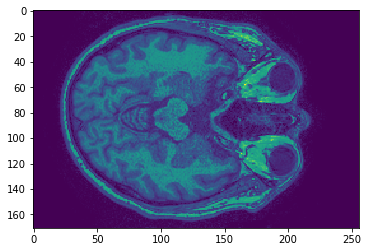

In [34]:
plt.imshow(matched[:,:,100])

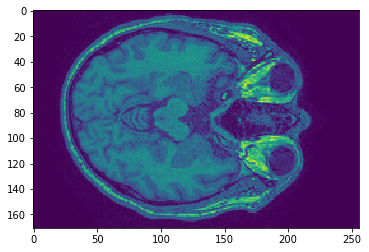

In [36]:
plt.imshow(data1[:,:,100])

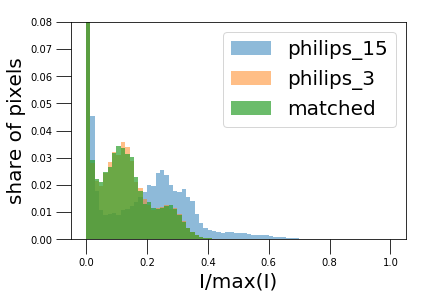

In [25]:
x, bins, p = plt.hist(data1.flatten()/data1.max(),bins=70,alpha=0.5, label = 'philips_15')
for item in p:
    item.set_height(item.get_height()/sum(x))

x2, bins2, p2 = plt.hist(data2.flatten()/data2.max(),bins=70,alpha=0.5, label = 'philips_3')
for item in p2:
    item.set_height(item.get_height()/sum(x2))

x_m, bins_m, p_m = plt.hist(matched.flatten()/matched.max(),bins=70,alpha=0.7, label = 'matched')
for item in p_m:
    item.set_height(item.get_height()/sum(x_m))
    
plt.ylim((0,0.08))
plt.legend(fontsize=20)
plt.tick_params(size=15)
plt.tick_params(size=15)
plt.xlabel('I/max(I)', fontsize = 20)
plt.ylabel('share of pixels', fontsize = 20)
plt.show()

In [26]:
matched2 = _match_cumulative_cdf(data2, data1)

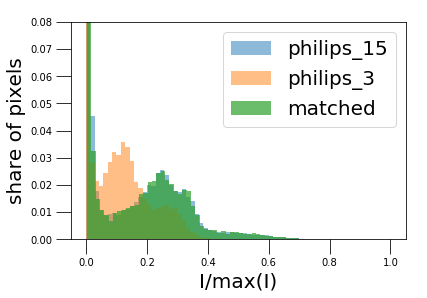

In [28]:
x, bins, p = plt.hist(data1.flatten()/data1.max(),bins=70,alpha=0.5, label = 'philips_15')
for item in p:
    item.set_height(item.get_height()/sum(x))

x2, bins2, p2 = plt.hist(data2.flatten()/data2.max(),bins=70,alpha=0.5, label = 'philips_3')
for item in p2:
    item.set_height(item.get_height()/sum(x2))

x_m, bins_m, p_m = plt.hist(matched2.flatten()/matched2.max(),bins=70,alpha=0.7, label = 'matched')
for item in p_m:
    item.set_height(item.get_height()/sum(x_m))
    
plt.ylim((0,0.08))
plt.legend(fontsize=20)
plt.tick_params(size=15)
plt.tick_params(size=15)
plt.xlabel('I/max(I)', fontsize = 20)
plt.ylabel('share of pixels', fontsize = 20)
plt.show()